<a href="https://colab.research.google.com/github/daystalker/GRIP_Tasks/blob/main/Grips_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIPS Foundation**

Data Science & Business Analytics Intern - November 2020

**Task 2** - TO EXPLORE SUPERVISED MACHINE LEARNING (LINEAR REGRESSION)

In [1]:
## Importing all the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Importing Dataset
Location =  "http://bit.ly/w-data"
Data = pd.read_csv(Location)
print("Data has been imported successfully")
Data

Data has been imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Totally there are 25 records with 2 Colums ( 1:Hours , 2:Scores )

In [3]:
## head() - Returns Top 5 Rows

Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
## tail() - Returns Bottom 5 Rows

Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
## describe() - Describes the whole data/dataset in count,mean,std,min,percentiles,max.

Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
## info() - returns concise summary of the dataframe ( can be said as metadata )

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **Data Visualisation**

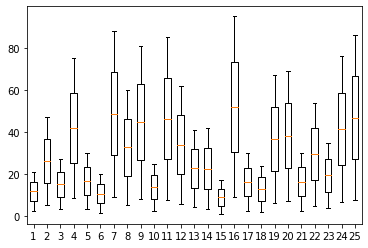

In [7]:
#Let's retrieve some Visualisations from data

plt.boxplot(Data)
plt.show()

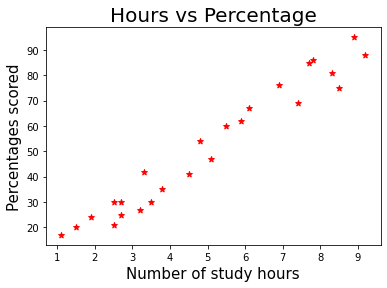

In [8]:
plt.title('Hours vs Percentage',fontsize=20)
plt.xlabel('Number of study hours',fontsize=15)
plt.ylabel('Percentages scored',fontsize=15)
plt.scatter(Data['Hours'], Data['Scores'],color='red' ,marker='*')

This plot depicts a positive linear relationship with data which implies more the number of study hours, high will be the percentage scored

# **Preparing the data**

In [9]:
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values

X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### **Splitting the data into Test and Training sets**

In [11]:
#Splitting this data into training and test sets by using Scikit-Learn buits-in train_test_split() method

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# **Training the Model**

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fitting of data
regressor.fit(X_train, Y_train)

print('Training complete')

Training complete


In [13]:
print("B0 =",regressor.intercept_,"\nB1 =",regressor.coef_)

B0 = 2.018160041434662 
B1 = [9.91065648]


In [14]:
# Plotting the regression line

Y0 = regressor.intercept_ + regressor.coef_*X_train

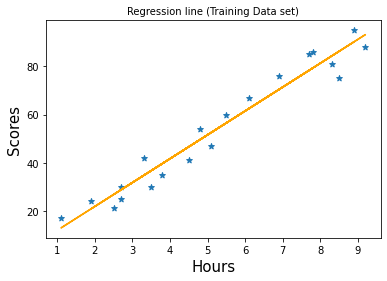

In [15]:
#Plotting on the training dataset 

plt.scatter(X_train,Y_train,marker='*')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line (Training Data set)",fontsize=10)
plt.show()

# **Testing the Model**

In [16]:
#Acted Values
Y_test

array([20, 27, 69, 30, 62])

In [17]:
#Predicted Values
Y_pred=regressor.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


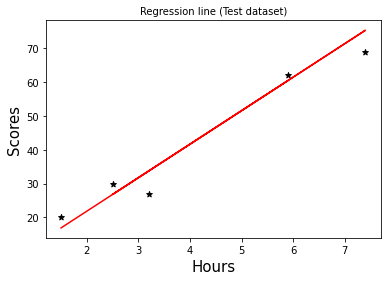

In [19]:
#plotting regression line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line (Test dataset)",fontsize=10)
plt.show()


# **Comparing Actual vs Predicted**

In [20]:
#Let's compare them both

Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **ACCURACY OF THE MODEL**

In [21]:
#Performing R2 test

from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

94% clearly indicates that model is a good fit

# **Predicting the Error**

Let's predict MSE,RMSE,MAE values

In [22]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
Root_MSE = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
MAE = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",Root_MSE)
print("Mean Absolute Error     = ",MAE)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


# **Predicting the score**

Let's predict the marks for a student studying for 9.25 Hrs

In [23]:
Prediction = regressor.predict([[9.25]])

#### **Conclusion**
print("predicted score for a student studying for 9.25 Hrs :{}".format(Prediction[0]))

predicted score for a student studying for 9.25 Hrs :93.69173248737539


# **Thank You Guys :)**